# RECOMMENDATION SYSTEMS


### What are recommendation systems/engines?
It is a type of information filtering systems that filters the data using different algorithms to improve the quality of search results (recommendations) by providing items that are most relevant items to users based on the item serached or are related to the search history of the user.


### How does a traditional heurestic for recommendations work ?
If we have to think of how to recommend items to the user -
* we may recommend items based on the most popular search among all the users,
or
* we may devide the users into multiple segments based on their perferences (user features) and recommend items to them based on the segment they belong to.

But, these methods have the following flaws associated to them:-
* In the first case, the most popular items would be the same for each user => everyone sees same recommendations.
* In the second case, with the increase in number of users the number of features will also increase => classifying the users into various segments will be a very difficult task

What is requires is the personalized recommendatations.



## How does a personalized recommendation system works?

#### Data Set Preparation
It is necessary to obtain product ratings (explicit data) entered by the user and implicit user's data from available data streams like search history, clicks, order history, etc.


####  Filtering The Data
Once the data is collected and stored properly, we have to filter out irrelevant information from it to make the final prediction. It can be done through any of the following algorithms.



## MOVIE RECOMMENDATION SYSTEM

Task - Recommend movies to the user by training the model on tbdb dataset

In [87]:
import pandas as pd 
import numpy as np 

In [88]:
credits = pd.read_csv("D:/C-Drive Project's Datasets/tmdb-5000-movie-dataset/tmdb_5000_credits.csv")
movies = pd.read_csv("D:/C-Drive Project's Datasets/tmdb-5000-movie-dataset/tmdb_5000_movies.csv")

In [89]:
credits.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [90]:
credits.columns

Index(['movie_id', 'title', 'cast', 'crew'], dtype='object')

In [91]:
credits.columns = ['id', 'title', 'cast', 'crew']

In [92]:
movies.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [93]:
movies.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count'],
      dtype='object')

In [94]:
movies = movies.merge(credits, on='id')

In [95]:
movies.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title_x', 'vote_average',
       'vote_count', 'title_y', 'cast', 'crew'],
      dtype='object')

In [96]:
movies.shape

(4803, 23)

In [97]:
movies.dtypes

budget                    int64
genres                   object
homepage                 object
id                        int64
keywords                 object
original_language        object
original_title           object
overview                 object
popularity              float64
production_companies     object
production_countries     object
release_date             object
revenue                   int64
runtime                 float64
spoken_languages         object
status                   object
tagline                  object
title_x                  object
vote_average            float64
vote_count                int64
title_y                  object
cast                     object
crew                     object
dtype: object


### 1. Demographic Filtering
They offer generalized recommendations to every user, based on item's popularity and/or genre. The System recommends the same items to users with similar demographic features. Since each user is different , this approach is considered to be too simple. The basic idea behind this system is that items that are more popular and critically acclaimed will have a higher probability of being liked by the average audience.


#### Strategy
* Decide a score metric to score or rate movie
* Calculate score for every movie.
* Sort the scores and recommend the best rated movie to the users


STEP 1

For rating movies we can use "voting_average" as a metric, but, averaging them out may bring high rating to low like 8.9 rating and only 3 votes can not consider better than 7.8 as avg rating for 40 votes. 
Thus using IMDB's weighted rating which is :


WR = (v/(v+m) * R) + (m/(v+m) * C)

where,
* v -> vote_count, the number of votes for the movie
* m -> the minimum votes required to be listed in the chart (90th percentile) = movies['vote_count'].quantile(0.9) 
* R -> vote_average, is the average rating of the movie, and
* C -> the mean vote across the whole report = movies['vote_average'].mean


In [98]:
m = movies['vote_count'].quantile(0.9)
C = movies['vote_average'].mean()

In [99]:
def imbd_weighted_ratings(movies, m=m, C=C):
    v =movies["vote_count"]
    R =movies["vote_average"]
    left_term = v /(v + m)
    right_term = m /(v + m) 
    return left_term* R + right_term* C

Assumption - To qualify the popularity charts we require atleast 90th percentile of user vote

In [100]:
qualified_movies  = movies.copy().loc[movies["vote_count"] >= m]

In [101]:
qualified_movies.shape

(481, 23)

In [102]:
# qualified_movies.head()

STEP 2

Calculate score for every movie.

In [103]:
qualified_movies["imdb_score"] = qualified_movies.apply(imbd_weighted_ratings, axis = 1)

In [104]:
qualified_movies.head(2)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,spoken_languages,status,tagline,title_x,vote_average,vote_count,title_y,cast,crew,imdb_score
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",7.050669
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",6.665696


STEP 3 

Sort the movies based on metric score (imdb_score)


In [105]:
qualified_movies.sort_values("imdb_score", ascending=False, inplace= True)

In [106]:
filtered_qualified_movies = qualified_movies[['title_y', 'popularity', 'vote_count','vote_average', "imdb_score"]]

In [107]:
filtered_qualified_movies.head()

,title_y,popularity,vote_count,vote_average,imdb_score
1881,The Shawshank Redemption,136.747729,8205,8.5,8.059258
662,Fight Club,146.757391,9413,8.3,7.939256
65,The Dark Knight,187.322927,12002,8.2,7.920020
3232,Pulp Fiction,121.463076,8428,8.3,7.904645
96,Inception,167.583710,13752,8.1,7.863239


In [108]:
def get_recommendations(k):
    return filtered_qualified_movies[:k]['title_y']

Recommending top-n movies (n=5)

In [109]:
get_recommendations(5)

1881    The Shawshank Redemption
662                   Fight Club
65               The Dark Knight
3232                Pulp Fiction
96                     Inception
Name: title_y, dtype: object

Visualizaing top 50 datapoints 

In [110]:
popular = movies.sort_values('popularity', ascending=False)

Text(0.5,1,'Popular Movies')

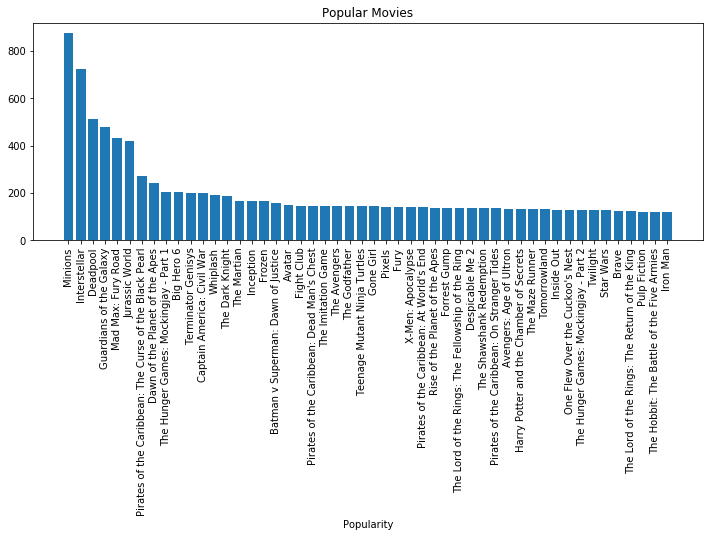

In [111]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,4))

plt.bar(popular['title_y'].head(50),popular['popularity'].head(50))
plt.xlabel("Popularity")
plt.xticks(rotation = 90)
plt.title("Popular Movies")

Text(0.5,1,'Popular Movies')

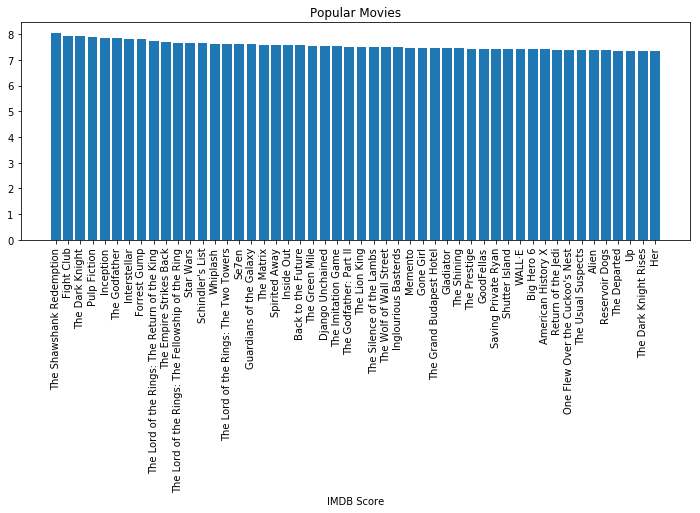

In [112]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,4))

plt.bar(qualified_movies['title_y'].head(50),qualified_movies['imdb_score'].head(50))
plt.xlabel("IMDB Score")
plt.xticks(rotation = 90)
plt.title("Popular Movies")

##### PROBLEM WITH DEMOGRAPHIC FILTERING - 
The most popular items would be the same for each user => everyone sees same recommendations.

### 2. Content Based Filtering

It recommends the user items that the user himself has previously liked. Eg, someone likes "Person Of Interest" series then the user will be recommended series from alike genre/plot. 

Two types of vectors are maintained by the recommendation system:
* Profile Vector - A vector containing the past behavior of the user,  i.e. the movies liked/disliked by the user and the ratings given by them. 
* Item Vector - Item vector contains the details of each item, say for movie it will store genre, cast, director, etc.

It then finds the Cosing Similarity, i.e., the cosine of the angle between the profile vector and the item vector.

This value ranges between -1 to 1.  Based on cosine distance items are arranges in descening order.

Other substitutes of Cosine Similarity:
* TOP-N APPROACH: top 10 movies are recommended.

* RATING SCALE APPROACH: A thershold is set and all items above that thresold are recommended.

* EUCLIDEAN DISTANCE: Similar items lie in close proximity to each other, this calculating euclidean distance between items and based on distance, items can be recommended.

* PEARSON'S CORRELATION: It talks in terms of correllation. Higher the correlation, more the similarity. 

E = summation here


m = mean


V = square root





SIM(u,v) = [ E( R(ui) - m(R(u)) )*(R(vi) - m(R(v))] /  [V E(R(ui) - m(R(u)) ) ^2 * V E(R(vi) - m(R(v)) ) ^2]



##### In this movie dataset overview gives the description of each movie, hence describing the plot of the movie.

#### Movie Description Based Recommender

In [118]:
movies["overview"].head()

0    In the 22nd century, a paraplegic Marine is di...
1    Captain Barbossa, long believed to be dead, ha...
2    A cryptic message from Bond’s past sends him o...
3    Following the death of District Attorney Harve...
4    John Carter is a war-weary, former military ca...
Name: overview, dtype: object

In [120]:
movies.overview.iloc[0]

'In the 22nd century, a paraplegic Marine is dispatched to the moon Pandora on a unique mission, but becomes torn between following orders and protecting an alien civilization.'

In [113]:
movies.overview.isnull().sum()

3

In [114]:
movies.overview = movies.overview.fillna("")

Since it is stream of texts we need to apply text processing (NLP)
* TF-IDF: (term instances/total instances)* log(number of documents/documents with term)

In [115]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words='english')

In [121]:
tfidf_matrix = tfidf.fit_transform(movies['overview'])
tfidf_matrix.shape

(4803, 20978)

At this point we have a matrix which represents a word (column) in the overview volabulary and the row has each movie. Doing so reduces the importance of words that occur frequently in the plot overviews/final similarity score




##### Cosing Similarity (A,B) 

= cos (theta)

= (A.B)/|A||B|

=[ E (A(i) B(i))]/ [ V(E A(i)^2) *  V(E B(i)^2)]

where,

E = summation here

&

V = square root


#### NOTE-
Since we have used the TF-IDF vectorizer, calculating the dot product will directly give us the cosine similarity score. Therefore, we will use sklearn's linear_kernel() instead of cosine_similarities() since it is faster.

In [136]:
from sklearn.metrics.pairwise import linear_kernel
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [138]:
#Construct a reverse map of indices and movie titles
indices = pd.Series(movies.index, index=movies['title_y']).drop_duplicates()

In [144]:
def get_recommendations(title, k):
    index = indices[title]
    
    similarity = list(enumerate(cosine_sim[index]))
    
    similarity = sorted(similarity, key=lambda x: x[1], reverse=True)
    similarity = similarity[1:k]
    
    movie_indices = [i[0] for i in similarity]
    
    return movies['title_y'].iloc[movie_indices]

In [147]:
get_recommendations('X-Men', 10)

134     Mission: Impossible - Rogue Nation
342                           Men in Black
1089                           The Phantom
101                     X-Men: First Class
203                                     X2
1894                                   War
590                              The Siege
33                   X-Men: The Last Stand
122               X-Men Origins: Wolverine
Name: title_y, dtype: object

#### Credits, Genres and Keywords Based Recommender


##### PROBLEM WITH CONTENT BASED FILTERING - 
Confined to recommend items that are of same types. It will never recommend products which the user has not bought or liked in the past. It narrows down the flexibility of the system.




###  3. Collaborative Filtering
This system matches persons with similar interests and provides recommendations based on this matching. Collaborative filters do not require item metadata like its content-based counterparts. 

##### Example - 
If person A likes 3 movies, say Interstellar, Inception and Predestination, and person B likes Inception, Predestination and The Prestige, then they have almost similar interests. We can say with some certainty that A should like The Prestige and B should like Interstellar. 

The collaborative filtering algorithm uses “User Behavior” for recommending items. This is one of the most commonly used algorithms in the industry as it is not dependent on any additional information. 



The collaborative filtering can be modeled in any of the following ways:-

#### User-User collaborative filtering
It finds similarity scores between users to pick the most similar users and  recommends products which these similar users have liked or bought previously.



#### LOADING AND EXPLORING DATA

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv("D:/C-Drive Project's Datasets/netflix-prize-data/combined_data_1.txt",names = ['User_Id', 'Rating'], usecols = [0,1])

In [ ]:
df.shape

In [ ]:
df.head()

In [ ]:
df.dtypes

In [ ]:
null_ratings = df.isnull().sum()[1]
null_ratings

In [ ]:
Unique_UserId = df['User_Id'].nunique()
Unique_UserId

In [ ]:
Total_reviews = df['User_Id'].count() - null_ratings
Total_reviews

References:
* https://www.kaggle.com/rounakbanik/movie-recommender-systems
* https://www.analyticsvidhya.com/blog/2018/06/comprehensive-guide-recommendation-engine-python/#
        